# Pengembangan Aplikasi Buku di Tengah Pandemi: Analisis Database dengan SQL


## Pendahuluan
Kehadiran virus corona telah mengubah pola perilaku masyarakat secara global. Kini, kita semua lebih cenderung untuk menghabiskan waktu di dalam rumah, menggantikan aktivitas di luar seperti berkumpul di kafe atau mal. Sebagai respons terhadap perubahan ini, perusahaan-perusahaan startup mulai mengembangkan aplikasi baru untuk memenuhi kebutuhan baru masyarakat. Sebagai bagian dari upaya tersebut, kita telah diberikan akses ke sebuah database yang berisi informasi tentang buku, penerbit, penulis, serta rating dan ulasan dari pelanggan. Data ini akan menjadi dasar penting dalam merancang penawaran harga untuk produk baru yang sedang kita kembangkan.


## Tujuan
Tujuan dari proyek ini adalah untuk melakukan analisis data menggunakan SQL terhadap database buku guna mendapatkan wawasan yang berharga terkait dengan industri buku dalam konteks pandemi yaitu:

1. Menjelaskan tujuan dari studi lakukan.󠀲󠀡󠀠󠀦󠀥󠀩󠀡󠀥󠀳
2. Pelajari tabelnya (tampilkan baris-baris pertamanya).󠀲󠀡󠀠󠀦󠀥󠀩󠀡󠀦󠀳
3. Buat kueri SQL untuk setiap tugas.󠀲󠀡󠀠󠀦󠀥󠀩󠀡󠀧󠀳
4. Tampilkan hasil dari setiap kueri tersebut pada notebook.󠀲󠀡󠀠󠀦󠀥󠀩󠀡󠀨󠀳
5. Jelaskan kesimpulan untuk setiap tugas.


## Tahapan
Berikut beberapa tahapan yang akan kita lakukan yaitu:

1. Hitung jumlah buku yang dirilis setelah tanggal 1 Januari 2000.󠀲󠀡󠀠󠀦󠀥󠀩󠀠󠀩󠀳
2. Hitung jumlah ulasan pengguna dan rating rata-rata untuk setiap buku.󠀲󠀡󠀠󠀦󠀥󠀩󠀡󠀠󠀳
3. Identifikasi penerbit yang telah menerbitkan jumlah buku terbanyak dengan jumlah halaman lebih dari 50 (hal ini akan membantu kita dalam mengecualikan brosur dan publikasi serupa dari hasil analisis).󠀲󠀡󠀠󠀦󠀥󠀩󠀡󠀡󠀳
4. Identifikasi penulis dengan rating rata-rata buku tertinggi: temukan buku dengan rating minimal 5.0.󠀲󠀡󠀠󠀦󠀥󠀩󠀡󠀢󠀳
5. Hitung jumlah rata-rata teks ulasan di antara pengguna yang memberi rating terhadap lebih dari 50 buku.



## Deskripsi Data

`books`:
- Berisi data tentang buku:
    - `book_id` — ID buku (**Primary Key** -- int)
    - `author_id` — ID penulis (**Foreign Key** -- int)
    - `title` — judul buku (varchar)
    - `num_pages` — jumlah halaman (int)
    - `publication_date` — tanggal penerbitan (datetime)
    - `publisher_id` — ID penerbit (**Foreign Key** -- int)

`authors`:
- Berisi data tentang penulis:
    - `author_id` — ID penulis (**Primary Key** -- int)
    - `author` — nama penulis (varchar)

`publishers`:
- Berisi data tentang penerbit:
    - `publisher_id` — ID penerbit (**Primary Key** -- int)
    - `publisher` — nama penerbit (varchar)

`ratings`:
- Berisi data tentang rating pengguna: 
    - `rating_id` — ID rating (**Primary Key** -- int)
    - `book_id` — ID buku (**Foreign Key** -- int)
    - `username` — nama pengguna yang memberi rating buku (varchar)
    - `rating` (int)

`reviews`:
- Berisi data tentang ulasan pelanggan:
    - `review_id` — ID ulasan (int)
    - `book_id` — ID buku (**Foreign Key** -- int)
    - `username` — nama pengguna yang mengulas buku (varchar)
    - `text` — teks ulasan (varchar)

-----

## Inisialisasi
- Import library dan kepentingan yang dibutuhkan

In [1]:
# import library yang diperlukan
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# configurasi database
db_config = {'user': 'practicum_student',         # nama pengguna
             'pwd': 's65BlTKV3faNIGhmvJVzOqhs', # kata sandi
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,              # port koneksi
             'db': 'data-analyst-final-project-db'}          # nama database

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                                     db_config['pwd'],
                                                                       db_config['host'],
                                                                       db_config['port'],
                                                                       db_config['db'])

engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

In [3]:
# query test
query = "SELECT * FROM books"
result = pd.io.sql.read_sql(query, con=engine)
result

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268
...,...,...,...,...,...,...
995,996,571,Wyrd Sisters (Discworld #6; Witches #2),265,2001-02-06,147
996,997,454,Xenocide (Ender's Saga #3),592,1996-07-15,297
997,998,201,Year of Wonders,358,2002-04-30,212
998,999,94,You Suck (A Love Story #2),328,2007-01-16,331


--------

## Hitung Jumlah Buku yang Dirilis Setelah Tanggal 1 Januari 2000󠀲󠀡󠀠󠀦󠀥󠀩󠀠󠀩󠀳
- Kita akan pelajari tabelnya dan menghitung jumlah buku yang dirilis pada tanggal yang ditentukan. Dalam blok kode ini, kita mengeksekusi query SQL untuk menghitung jumlah buku yang dirilis setelah tanggal 1 Januari 2000

In [4]:
# query untuk tabel books
query_books_all = "SELECT * FROM books"
result_books_all = pd.read_sql(query_books_all, con=engine)
result_books_all.info()
result_books_all.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268
5,6,257,1st to Die (Women's Murder Club #1),424,2005-05-20,116
6,7,258,2nd Chance (Women's Murder Club #2),400,2005-05-20,116
7,8,260,4th of July (Women's Murder Club #4),448,2006-06-01,318
8,9,563,A Beautiful Mind,461,2002-02-04,104
9,10,445,A Bend in the Road,341,2005-04-01,116


<font color = green> Temuan </font>
- Tidak terdapat nilai yang hilang untuk tabel tersebut.

In [5]:
# query untuk menghitung jumlah buku saja pada tanggal 1 Januari tahun 2000
query_book_count = """
        SELECT COUNT(*)
        FROM books
        WHERE publication_date > '2000-01-01';
        """
result_book_count = pd.io.sql.read_sql(query_book_count, con=engine)
result_book_count

,count
0,819


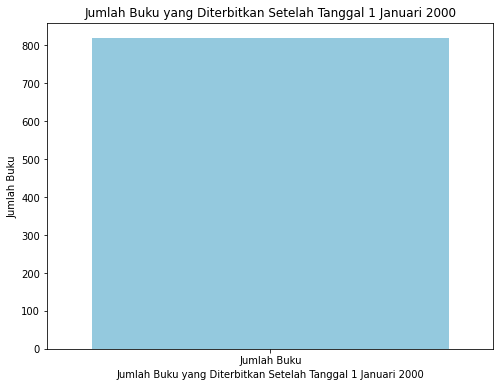

In [6]:
# Data dari hasil query
jumlah_buku = result_book_count.iloc[0, 0]

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=["Jumlah Buku"], y=[jumlah_buku], color='skyblue')
plt.xlabel("Jumlah Buku yang Diterbitkan Setelah Tanggal 1 Januari 2000")
plt.ylabel("Jumlah Buku")
plt.title("Jumlah Buku yang Diterbitkan Setelah Tanggal 1 Januari 2000")
plt.show()

<font color = green> Kesimpulan Sementara </font>
- Kita telah menampilkan jumlah 10 baris pertama untuk jumlah buku setelah rilis dari tanggal 1 Januari tahun 2000. Jumlah buku yang terdapat adalah 819

----

## Hitung Jumlah Ulasan Pengguna dan Rating Rata-Rata untuk Setiap Buku
-  Menghitung  jumlah ulasan pengguna dan rating rata-rata untuk setiap buku.󠀲󠀡󠀠󠀦󠀥󠀩󠀡󠀠󠀳 Dalam query SQL ini, kita menggabungkan data dari tabel books, ratings, dan reviews, dan kemudian menghitung jumlah ulasan dan rating rata-rata untuk setiap buku menggunakan fungsi agregasi COUNT() dan AVG(). Hasilnya kemudian disimpan dalam DataFrame dan 10 baris pertamanya ditampilkan.

In [7]:
# Tulis query SQL
query_reviews_ratings_books = """SELECT b.book_id,
       COUNT(DISTINCT rv.review_id) AS num_reviews,
       AVG(r.rating) AS avg_rating
       FROM books b
       LEFT JOIN ratings r ON b.book_id = r.book_id
       LEFT JOIN reviews rv ON b.book_id = rv.book_id
       GROUP BY b.book_id
       ORDER BY b.book_id;
        """
result_query_reviews_ratings_books = pd.read_sql(query_reviews_ratings_books, con = engine)
result_query_reviews_ratings_books.info()
result_query_reviews_ratings_books.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   book_id      1000 non-null   int64  
 1   num_reviews  1000 non-null   int64  
 2   avg_rating   1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


,book_id,num_reviews,avg_rating
0,1,2,3.666667
1,2,1,2.500000
2,3,3,4.666667
3,4,2,4.500000
4,5,4,4.000000
5,6,4,3.500000
6,7,3,3.000000
7,8,3,4.000000
8,9,2,4.250000
9,10,3,3.200000


<font color = green > Temuan </font>
- Tidak ada nilai yang hilang pada tabel tersebut.

In [8]:
# menulis query untuk filter kolom title, avg_rating dan review_count
query_rating_reviews = """
    SELECT
        books.title,
        subquery.avg_rating AS avg_rating,
        subquery.review_count
    FROM
        (
            SELECT
                reviews.book_id as book_id,
                COUNT(DISTINCT reviews.review_id) AS review_count,
                AVG(ratings.rating) AS avg_rating
            FROM
                reviews
                INNER JOIN ratings ON ratings.book_id = reviews.book_id
            GROUP BY
                reviews.book_id
            ORDER BY
                review_count DESC,
                avg_rating DESC
        ) AS subquery
    INNER JOIN books ON subquery.book_id = books.book_id
    ORDER BY
        review_count DESC,
        avg_rating DESC
    LIMIT 10
"""

result_ratings_reviews = pd.read_sql(query_rating_reviews, con=engine)
result_ratings_reviews

,title,avg_rating,review_count
0,Twilight (Twilight #1),3.662500,7
1,Harry Potter and the Prisoner of Azkaban (Harr...,4.414634,6
2,Harry Potter and the Chamber of Secrets (Harry...,4.287500,6
3,The Book Thief,4.264151,6
4,The Glass Castle,4.206897,6
5,The Hobbit or There and Back Again,4.125000,6
6,Outlander (Outlander #1),4.125000,6
7,The Curious Incident of the Dog in the Night-Time,4.081081,6
8,The Lightning Thief (Percy Jackson and the Oly...,4.080645,6
9,Water for Elephants,3.977273,6


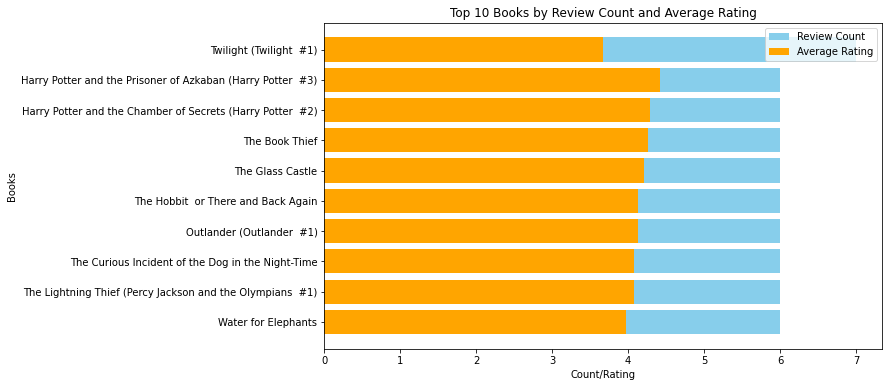

In [9]:
# visualisasi top 10 buku berdasarkan review count dan average rating
plt.figure(figsize=(10, 6))
plt.barh(result_ratings_reviews['title'], result_ratings_reviews['review_count'], color='skyblue', label='Review Count')
plt.barh(result_ratings_reviews['title'], result_ratings_reviews['avg_rating'], color='orange', label='Average Rating')

plt.xlabel('Count/Rating')
plt.ylabel('Books')
plt.title('Top 10 Books by Review Count and Average Rating')
plt.legend()
plt.gca().invert_yaxis()  # Membalik urutan agar yang teratas menjadi yang pertama
plt.show()

<font color = green > Kesimpulan Sementara </font>
- Dari bab Ulasan Pengguna dan Rating Rata-Rata untuk Setiap Buku, kita memfilter 10 Buku, buku dengan judul `Harry Potter and the Prisoner of Azkaban` memiliki rata-rata rating paling tinggi meskipun rata-rata jumlah reviewer yang hitung berkisar 6. Hal ini memungkinkan kesan dari buku tersebut sangatlah bagus. Sementara itu `Twilight` menempati posisi rata-rata rating terendah meskipun memiliki jumlah review di atas 6.

--------

## Identifikasi Penerbit yang Telah Menerbitkan Jumlah Buku Terbanyak dengan Jumlah Halaman Lebih dari 50󠀡
- Dalam query ini, kita menggabungkan data dari tabel publishers dan books untuk menghitung jumlah buku yang telah diterbitkan oleh setiap penerbit. Kemudian, kita memfilter buku-buku dengan jumlah halaman lebih dari 50 menggunakan klausa WHERE. Hasilnya dikelompokkan berdasarkan publisher_id dan publisher, dan diurutkan berdasarkan jumlah buku secara descending (DESC). Kita juga menggunakan LIMIT 1 untuk hanya mendapatkan penerbit dengan jumlah buku terbanyak.

In [10]:
query_publisher_all = """SELECT p.publisher_id,
       p.publisher,
       COUNT(*) AS num_books
       FROM publishers p
       JOIN books b ON p.publisher_id = b.publisher_id
       GROUP BY p.publisher_id, p.publisher
       ORDER BY num_books DESC;"""
result_query_publisher_all = pd.read_sql(query_publisher_all, con = engine)
result_query_publisher_all.info()
result_query_publisher_all.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
 2   num_books     340 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.1+ KB


,publisher_id,publisher,num_books
0,212,Penguin Books,42
1,309,Vintage,31
2,116,Grand Central Publishing,25
3,217,Penguin Classics,24
4,33,Ballantine Books,19
5,35,Bantam,19
6,45,Berkley,17
7,284,St. Martin's Press,14
8,46,Berkley Books,14
9,333,William Morrow Paperbacks,13


<font color = green> Temuan </font>
- Tidak ada nilai yang hilang pada tabel tersebut.

In [11]:
query_publisher = """SELECT p.publisher_id,
       p.publisher,
       COUNT(*) AS num_books
       FROM publishers p
       JOIN books b ON p.publisher_id = b.publisher_id
       WHERE b.num_pages > 50
       GROUP BY p.publisher_id, p.publisher
       ORDER BY num_books DESC
       LIMIT 1;"""
result_query_publisher = pd.read_sql(query_publisher, con=engine)
result_query_publisher

,publisher_id,publisher,num_books
0,212,Penguin Books,42


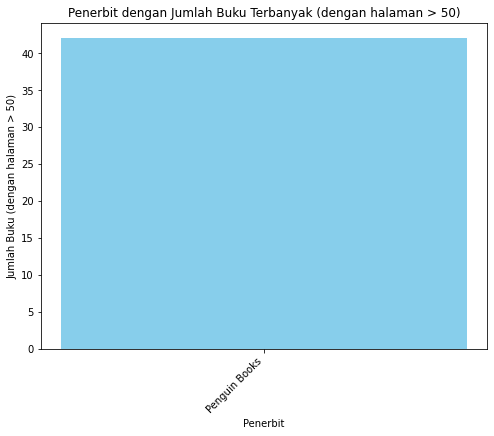

In [12]:
# data dari hasil query
publisher_name = result_query_publisher['publisher'].iloc[0]
num_books = result_query_publisher['num_books'].iloc[0]

# plot
plt.figure(figsize=(8, 6))
plt.bar(publisher_name, num_books, color='skyblue')
plt.xlabel("Penerbit")
plt.ylabel("Jumlah Buku (dengan halaman > 50)")
plt.title("Penerbit dengan Jumlah Buku Terbanyak (dengan halaman > 50)")
plt.xticks(rotation=45, ha='right')
plt.show()

<font color = green> Kesimpulan Sementara </font>
- Kita telah mengiris publisher yang memiliki jumlah halaman yang lebih dari 50. `Publisher Penguin` Books dengan id nomor 212 dan buku yang tercatat memiliki lebih dari 50 halaman yaitu sebesar 42.

------

## Identifikasi Penulis dengan Rating Rata-Rata Buku Tertinggi
-  Di sini kita akan temukan buku dengan rating minimal 5.󠀲󠀡󠀠󠀦󠀥󠀩󠀡󠀢󠀳 Dalam query ini, kita melakukan JOIN antara tabel authors, books, dan ratings untuk menggabungkan data dari ketiga tabel tersebut. Kemudian kita menggunakan klausa GROUP BY untuk mengelompokkan data berdasarkan author_id dan author, dan menghitung rating rata-rata buku untuk setiap penulis. Kita kemudian menggunakan klausa HAVING untuk membatasi hasil hanya pada penulis dengan rating rata-rata buku minimal 5. Hasilnya diurutkan berdasarkan rating rata-rata buku secara descending.

In [13]:
# memeriksa kelengkapan gabungan database
query_authors_ratings_all = """
    SELECT a.author_id,
           a.author,
           AVG(r.rating) AS avg_rating
    FROM authors a
    JOIN books b ON a.author_id = b.author_id
    JOIN ratings r ON b.book_id = r.book_id
    GROUP BY a.author_id, a.author
    ORDER BY avg_rating DESC;
"""

result_query_authors_ratings_all = pd.read_sql(query_authors_ratings_all, con=engine)
result_query_authors_ratings_all.info()
result_query_authors_ratings_all.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   author_id   636 non-null    int64  
 1   author      636 non-null    object 
 2   avg_rating  636 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 15.0+ KB


,author_id,author,avg_rating
0,562,Susan Hill/John Lawrence,5.0
1,347,Kerry Patterson/Joseph Grenny/Ron McMillan/Al ...,5.0
2,84,Charles Dickens,5.0
3,389,Marguerite Henry/Wesley Dennis,5.0
4,419,Mike Carey/Glenn Fabry/Neil Gaiman,5.0
5,412,Michael Lewis,5.0
6,250,James Clavell,5.0
7,399,Mark Twain/Shelly Fisher Fishkin,5.0
8,79,Chaim Potok,5.0
9,450,Nikolai Gogol/Robert A. Maguire/Zlatko Crnković,5.0


<font color = green> Temuan </font>
- Tidak ada nilai yang hilang pada tabel tersebut.

In [14]:
# memfilter penulis dengan rating rata-rata buku tertinggi
query_authors_ratings = """
SELECT
    a.author AS author_name,
    AVG(subq_b.avg_rating) AS avg_rating
FROM
    books b
INNER JOIN
    authors a ON a.author_id = b.author_id
INNER JOIN
    (SELECT
        b.book_id,
        COUNT(r.rating_id) AS ratings_num,
        AVG(r.rating) AS avg_rating
     FROM
         books b
INNER JOIN
         ratings r ON r.book_id = b.book_id
    GROUP BY
         b.book_id
    HAVING
         COUNT(r.rating_id) > 50
    ) AS subq_b ON subq_b.book_id = b.book_id

GROUP BY
    author_name
ORDER BY
    avg_rating DESC

"""

result_query_authors_ratings = pd.read_sql(query_authors_ratings, con = engine)
result_query_authors_ratings

,author_name,avg_rating
0,J.K. Rowling/Mary GrandPré,4.283844
1,Markus Zusak/Cao Xuân Việt Khương,4.264151
2,J.R.R. Tolkien,4.258446
3,Louisa May Alcott,4.192308
4,Rick Riordan,4.080645
5,William Golding,3.901408
6,J.D. Salinger,3.825581
7,Paulo Coelho/Alan R. Clarke/Özdemir İnce,3.789474
8,William Shakespeare/Paul Werstine/Barbara A. M...,3.787879
9,Dan Brown,3.754540


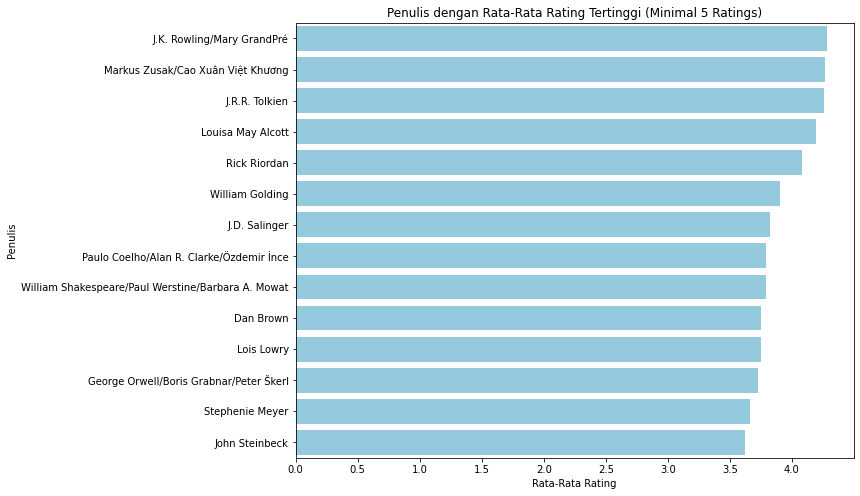

In [15]:
# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='avg_rating', y='author_name', data=result_query_authors_ratings, color='skyblue')
plt.xlabel("Rata-Rata Rating")
plt.ylabel("Penulis")
plt.title("Penulis dengan Rata-Rata Rating Tertinggi (Minimal 5 Ratings)")
plt.show()

<font color = green> Kesimpulan Sementara </font>
- Kita akan mengambil 3 sample tertinggi dari seluruh sample yang kita tampilkan. Penulis dengan rata-rata rating tertinggi yaitu `J.K. Rowling/Mary GrandPré` dengan nilai yang tidak berbedah jauh oleh penulis `Markus Zusak/Cao Xuân Việt Khương` serta `J.R.R. Tolkien`. `John Steinbeck` menempati posisi terendah untuk kategori penulis dengan rata-rata rating tertinggi.

-------

## Hitung Jumlah Rata-Rata Teks Ulasan di Antara Pengguna yang Memberi Rating Terhadap Lebih dari 50 buku
- Melakukan JOIN langsung antara tabel reviews dan ratings, kemudian mengelompokkan berdasarkan pengguna dan menghitung jumlah rata-rata teks ulasan di antara pengguna yang memberi rating terhadap lebih dari 50 buku. 

In [16]:
# memeriksa kelengkapan gabungan data
query_reviews_ratings_all = """SELECT AVG(CHAR_LENGTH(r.text)) AS avg_review_length
      FROM reviews r
      JOIN ratings ra ON r.username = ra.username
      GROUP BY r.username;"""
result_reviews_ratings_all = pd.read_sql(query_reviews_ratings_all, con = engine)
result_reviews_ratings_all.info()
result_reviews_ratings_all.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_review_length  160 non-null    float64
dtypes: float64(1)
memory usage: 1.4 KB


,avg_review_length
0,86.238095
1,67.000000
2,81.263158
3,96.333333
4,101.250000
5,85.761905
6,106.736842
7,100.857143
8,85.400000
9,92.555556


<font color = green> Temuan </font>
- Tidak ada nilai yang hilang pada tabel tersebut.

In [17]:
# memnulis query untuk rata-rata teks ulasan antara pengguna yang memberi rating terhadap lebih dari 50 buku
query_avg_reviews_books = """
SELECT AVG(review_count) AS total_avg_review_count
FROM (
    SELECT COUNT(r.text) AS review_count
    FROM reviews r
    WHERE r.username IN (
        SELECT username
        FROM ratings
        GROUP BY username
        HAVING COUNT(book_id) > 50
    )
    GROUP BY r.username
) AS subquery;

"""
result_avg_reviews_books = pd.read_sql(query_avg_reviews_books, con = engine)
result_avg_reviews_books

,total_avg_review_count
0,24.333333


<font color = green> Kesimpulan Sementara </font>
- Total rata-rata review terhadap lebih dari 50 buku mencapai angka 24.33

--------

## **Kesimpulan Umum**
- Kita telah menampilkan jumlah 10 baris pertama untuk jumlah buku setelah rilis dari tanggal 1 Januari tahun 2000. Jumlah buku yang terdapat adalah 819.
- Dari bab Ulasan Pengguna dan Rating Rata-Rata untuk Setiap Buku, kita memfilter 10 Buku, buku dengan judul `Harry Potter and the Prisoner of Azkaban` memiliki rata-rata rating paling tinggi meskipun rata-rata jumlah reviewer yang hitung berkisar 6. Hal ini memungkinkan kesan dari buku tersebut sangatlah bagus. Sementara itu `Twilight` menempati posisi rata-rata rating terendah meskipun memiliki jumlah review di atas 6.
- Kita telah mengiris publisher yang memiliki jumlah halaman yang lebih dari 50. Publisher Penguin Books dengan id nomor 212 dan buku yang tercatat memiliki lebih dari 50 halaman yaitu sebesar 42.
- Kita akan mengambil 3 sample tertinggi dari seluruh sample yang kita tampilkan. Penulis dengan rata-rata rating tertinggi yaitu `J.K. Rowling/Mary GrandPré` dengan nilai yang tidak berbedah jauh oleh penulis `Markus Zusak/Cao Xuân Việt Khương` serta `J.R.R. Tolkien`. `John Steinbeck` menempati posisi terendah untuk kategori penulis dengan rata-rata rating tertinggi.
- Total rata-rata review terhadap lebih dari 50 buku mencapai angka 24.33